<a href="https://colab.research.google.com/github/MichaelRDionne/Caltech-AI-Machine-Learning-Bootcamp/blob/main/Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Architecture


In [1]:
#import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report


In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Caltech emotional recognition/data/train',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Caltech emotional recognition/data/test',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')


Found 15305 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


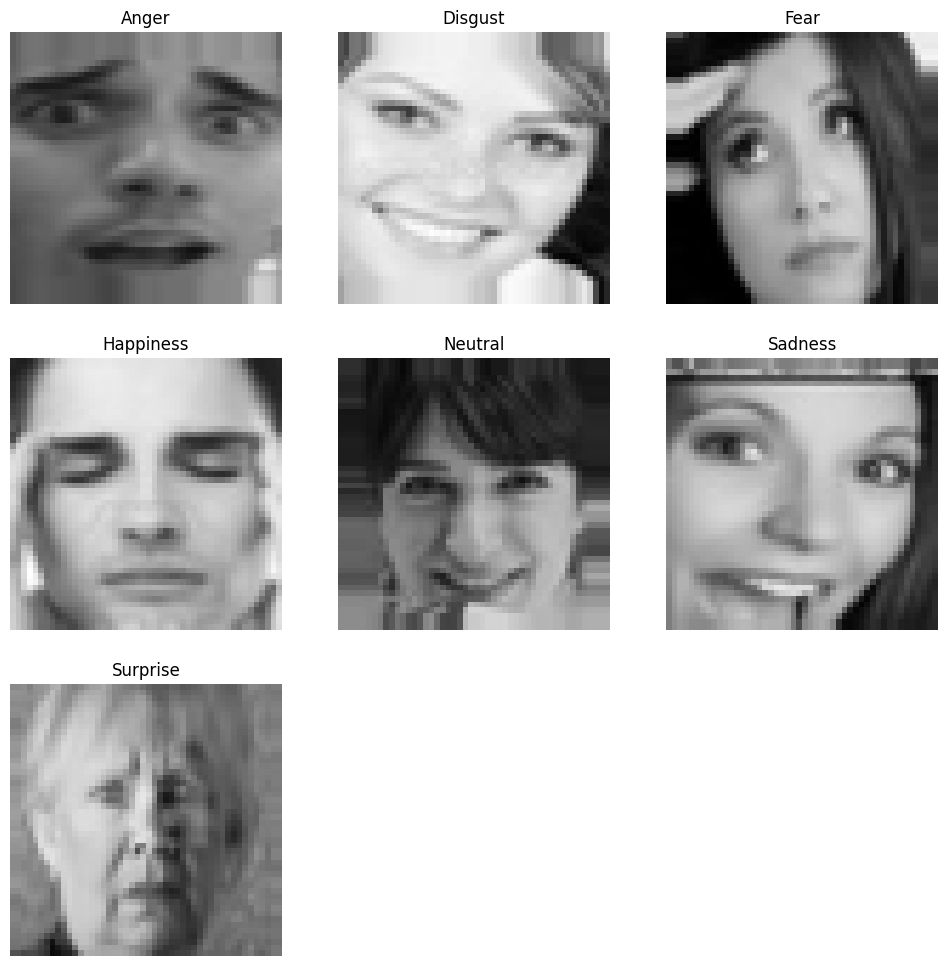

In [3]:
#plot sample images for all of the classes
classes = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

plt.figure(figsize=(12,12))
for i in range(len(classes)):
    ax = plt.subplot(3, 3, i+1)
    images = train_generator.next()[0]
    img = images[0]
    plt.imshow(img)
    plt.title(classes[i])
    plt.axis("off")
plt.show()


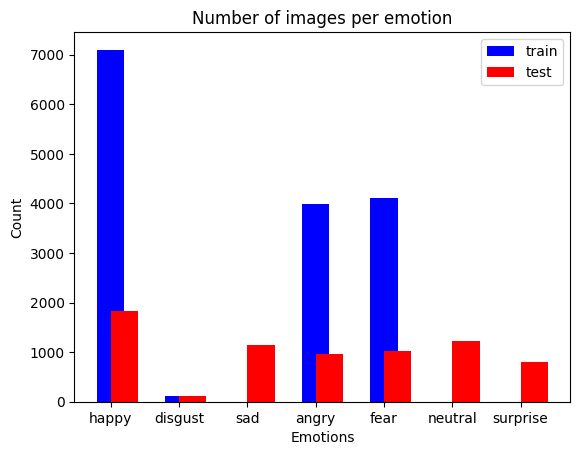

In [4]:
#plot a bargraph
import os
import matplotlib.pyplot as plt

# Define your directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/Caltech emotional recognition/data/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Caltech emotional recognition/data/test'

# Get list of emotions
emotions = os.listdir(train_dir)

# Initialize lists to hold the counts
train_counts = []
test_counts = []

# Iterate over each emotion
for emotion in emotions:
    # Get list of images for this emotion in the training and testing directories
    train_emotion_images = os.listdir(os.path.join(train_dir, emotion))
    test_emotion_images = os.listdir(os.path.join(test_dir, emotion))

    # Append the counts to the lists
    train_counts.append(len(train_emotion_images))
    test_counts.append(len(test_emotion_images))

# Create the bar plot
x = range(len(emotions))
plt.bar(x, train_counts, width=0.4, label='train', color='b', align='center')
plt.bar(x, test_counts, width=0.4, label='test', color='r', align='edge')

# Adding labels and title
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Number of images per emotion')
plt.legend()
plt.xticks(x, emotions)

plt.show()


In [5]:
#Build a data augmentation for train data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(48,48),
                                                    color_mode='grayscale',
                                                    batch_size=32,
                                                    class_mode='categorical')


Found 15305 images belonging to 7 classes.


In [6]:
#Build a data augmentation for test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(48,48),
                                                  color_mode='grayscale',
                                                  batch_size=32,
                                                  class_mode='categorical')



Found 7066 images belonging to 7 classes.


In [39]:
#Build a CNN model
from tensorflow import keras

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)))  # Changed the depth from 3 to 1
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(7, activation='softmax'))  # make sure your number of classes is 7

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [8]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator,
                    callbacks=[early_stop])


Epoch 1/10
479/479 [==============================] - 3414s 7s/step - loss: 1.6591 - accuracy: 0.3778 - val_loss: 2.9592 - val_accuracy: 0.2404
Epoch 2/10
479/479 [==============================] - 42s 87ms/step - loss: 1.1650 - accuracy: 0.4420 - val_loss: 3.6464 - val_accuracy: 0.2354
Epoch 3/10
479/479 [==============================] - 41s 85ms/step - loss: 1.0839 - accuracy: 0.4864 - val_loss: 5.9464 - val_accuracy: 0.2652
Epoch 4/10
479/479 [==============================] - 41s 86ms/step - loss: 1.0358 - accuracy: 0.5099 - val_loss: 8.4121 - val_accuracy: 0.2656


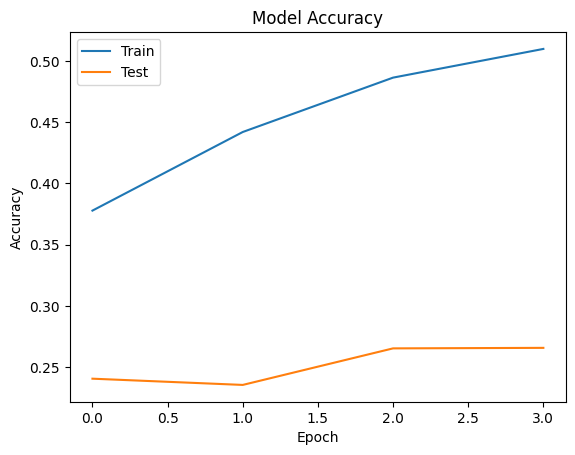

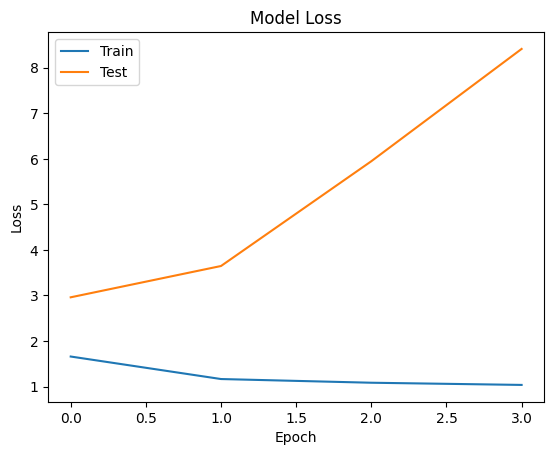

In [9]:
# plotting the training and validation accuracy, as well as the training and validation loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [10]:
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
print(classification_report(test_generator.classes, y_pred))


221/221 [==============================] - 10s 44ms/step
              precision    recall  f1-score   support

           0       0.17      0.03      0.05       960
           1       0.00      0.00      0.00       111
           2       0.07      0.00      0.01      1018
           3       0.26      0.97      0.41      1825
           4       0.00      0.00      0.00      1216
           5       0.00      0.00      0.00      1139
           6       0.00      0.00      0.00       797

    accuracy                           0.25      7066
   macro avg       0.07      0.14      0.07      7066
weighted avg       0.10      0.25      0.11      7066



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Customized CNN Architecture

In [14]:
#Customize the CNN Architecture
from tensorflow import keras

model_customized = keras.models.Sequential()

model_customized.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)))  # Changed the depth from 3 to 1
model_customized.add(keras.layers.MaxPooling2D((2,2)))
model_customized.add(keras.layers.BatchNormalization())
model_customized.add(keras.layers.Dropout(0.25))

model_customized.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model_customized.add(keras.layers.MaxPooling2D((2,2)))
model_customized.add(keras.layers.BatchNormalization())
model_customized.add(keras.layers.Dropout(0.25))

model_customized.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model_customized.add(keras.layers.MaxPooling2D((2,2)))
model_customized.add(keras.layers.BatchNormalization())
model_customized.add(keras.layers.Dropout(0.25))

model_customized.add(keras.layers.Flatten())

model_customized.add(keras.layers.Dense(512, activation='relu'))
model_customized.add(keras.layers.BatchNormalization())
model_customized.add(keras.layers.Dropout(0.5))
model_customized.add(keras.layers.Dense(7, activation='softmax'))  # make sure your number of classes is 7

# Compile the model with RMSprop optimizer
model_customized.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
# Train the model
# Training will stop early if the validation loss does not improve for two consecutive epochs.
# Define early stopping

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# Train the model
history_customized = model_customized.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator,
                    callbacks=[early_stop])

Epoch 1/10
479/479 [==============================] - 43s 87ms/step - loss: 1.6229 - accuracy: 0.3830 - val_loss: 3.9303 - val_accuracy: 0.2583
Epoch 2/10
479/479 [==============================] - 42s 87ms/step - loss: 1.1151 - accuracy: 0.4772 - val_loss: 5.2806 - val_accuracy: 0.2579
Epoch 3/10
479/479 [==============================] - 41s 86ms/step - loss: 1.0302 - accuracy: 0.5203 - val_loss: 6.0989 - val_accuracy: 0.3354


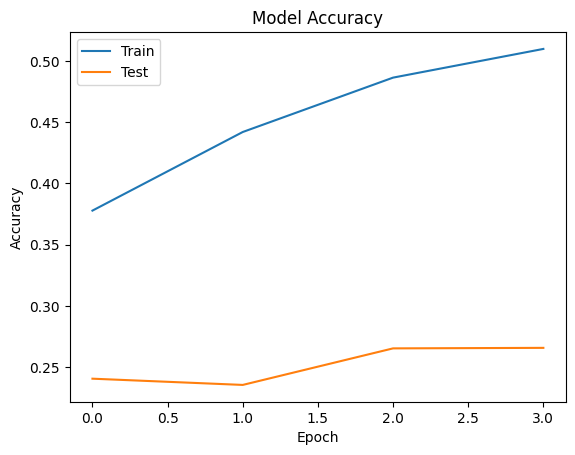

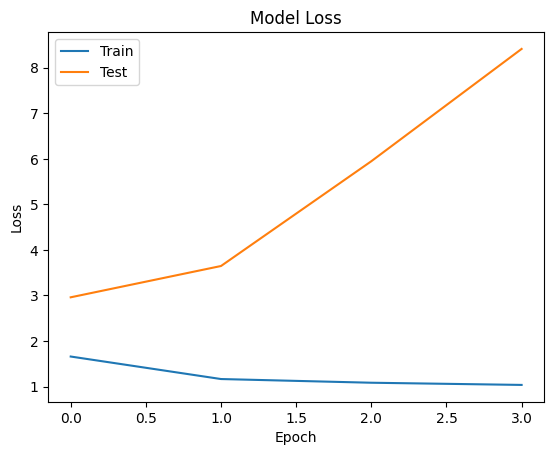

In [16]:
# plotting the training and validation accuracy, as well as the training and validation loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [17]:
# Evaluate the model
predictions_customized = model_customized.predict(test_generator)
y_pred_customized = np.argmax(predictions_customized, axis=1)
print(classification_report(test_generator.classes, y_pred_customized))


221/221 [==============================] - 10s 43ms/step
              precision    recall  f1-score   support

           0       0.14      0.20      0.17       960
           1       0.00      0.00      0.00       111
           2       0.14      0.37      0.20      1018
           3       0.27      0.44      0.33      1825
           4       0.00      0.00      0.00      1216
           5       0.00      0.00      0.00      1139
           6       0.00      0.00      0.00       797

    accuracy                           0.19      7066
   macro avg       0.08      0.14      0.10      7066
weighted avg       0.11      0.19      0.14      7066



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Transfer Learning

In [41]:
#use of VCG16 requires conversion of previous grayscale data to RGB
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Caltech emotional recognition/data/train',
    target_size=(48, 48),
    color_mode='rgb',  # Change color_mode from 'grayscale' to 'rgb'
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Caltech emotional recognition/data/test',
    target_size=(48, 48),
    color_mode='rgb',  # Change color_mode from 'grayscale' to 'rgb'
    batch_size=32,
    class_mode='categorical')


Found 15305 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [42]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the top layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add a dense layer at the end of the pre-trained model followed by a dropout layer
x = base_model.output
x = keras.layers.Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Add the final output layer with the SoftMax activation function
predictions = Dense(7, activation='softmax')(x)  # make sure your number of classes is 7

# Define the model
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_transfer.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [43]:
# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, mode='min')

# Train the model
history_transfer = model_transfer.fit(train_generator,
                                      epochs=15,
                                      validation_data=validation_generator,
                                      callbacks=[early_stop])

Epoch 1/15
479/479 [==============================] - 72s 149ms/step - loss: 1.0985 - accuracy: 0.4697 - val_loss: 4.8615 - val_accuracy: 0.2954
Epoch 2/15
479/479 [==============================] - 69s 145ms/step - loss: 1.0456 - accuracy: 0.4955 - val_loss: 5.7673 - val_accuracy: 0.3063
Epoch 3/15
479/479 [==============================] - 69s 143ms/step - loss: 1.0372 - accuracy: 0.4994 - val_loss: 6.0361 - val_accuracy: 0.2942


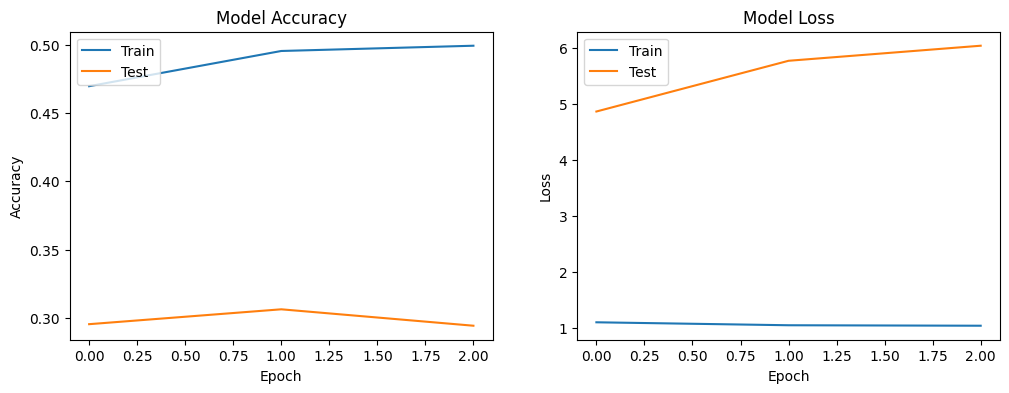

In [46]:
# Plot the training and validation accuracy, and the loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['accuracy'])
plt.plot(history_transfer.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['loss'])
plt.plot(history_transfer.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [45]:
# Evaluate the model
from sklearn.metrics import classification_report

# Predict the classes
predictions_transfer = model_transfer.predict(validation_generator)
y_pred_transfer = np.argmax(predictions_transfer, axis=1)

# The true class labels
y_true = validation_generator.classes

# Generate classification report
report = classification_report(y_true, y_pred_transfer, target_names=validation_generator.class_indices.keys())
print(report)



221/221 [==============================] - 19s 84ms/step
              precision    recall  f1-score   support

       angry       0.12      0.11      0.11       960
     disgust       0.00      0.00      0.00       111
        fear       0.15      0.06      0.09      1018
       happy       0.26      0.81      0.39      1825
     neutral       0.00      0.00      0.00      1216
         sad       0.00      0.00      0.00      1139
    surprise       0.00      0.00      0.00       797

    accuracy                           0.23      7066
   macro avg       0.08      0.14      0.08      7066
weighted avg       0.10      0.23      0.13      7066



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Three** more methods to increase the model's performance:

##**Hyperparameter tuning** using Keras Tuner

In [47]:
!pip install keras-tuner


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from tensorflow import keras
from kerastuner import RandomSearch

def build_model(hp):
    model = keras.models.Sequential()

    # Assuming the images are grayscale, input_shape should be (48, 48, 1)
    model.add(keras.layers.Conv2D(32, (3,3), input_shape=(48, 48, 3)))

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Flatten())

    # Assuming you have 10 classes for your problem
    model.add(keras.layers.Dense(10, activation='softmax'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

tuner.search_space_summary()

tuner.search(train_generator, 
             epochs=5, 
             validation_data=validation_generator,
             steps_per_epoch=len(train_generator),
             validation_steps=len(validation_generator))

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")



Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
320               |320               |units
0.0001            |0.0001            |learning_rate

Epoch 1/5


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/base_tuner.py", line 270, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/base_tuner.py", line 235, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/tuner.py", line 214, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/hypermodel.py", line 144, in fit
    return model.fit(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    rais

RuntimeError: ignored

## **Regularization**: This can be done by adding dropout layers or adding weight decay to the layers in your model.

In [54]:
from tensorflow.keras import regularizers
import tensorflow as tf


model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1), kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    # more layers as needed...
    layers.Dense(7, activation='softmax')
])


## **Ensemble methods**: This typically involves training multiple models and combining their predictions. 

In [55]:
model1 = create_model()
model2 = create_model()

model1.fit(train_generator, epochs=10)
model2.fit(train_generator, epochs=10)

predictions1 = model1.predict(test_generator)
predictions2 = model2.predict(test_generator)

# Average the predictions
final_predictions = (predictions1 + predictions2) / 2


NameError: ignored